In [9]:
from types import MethodType
from matplotlib import pyplot as plt
from collections import defaultdict

In [211]:
%run player.ipynb
%run boosters.ipynb
%run simulator.ipynb

In [117]:
grades = pd.read_csv("./results/card_scores_vows.csv", index_col=0)
grades = grades.set_index("name", drop=True)
grades.colors = grades.colors.fillna("")

In [135]:
def number_by_grade(hand, color):
    print(hand)
    return [grades.loc[card].grade for card in hand if color in grades.loc[card].colors]

def best_score(hand, color):
    best = 0.4
    return max([best]+[grades.loc[card].win_rate for card in hand if color in grades.loc[card].colors])

In [163]:
def pre_pick(self, hand):
    pick = 15 - len(hand)
    best_green = best_score(hand, "G")
    best_red = best_score(hand, "R")
    best_blue = best_score(hand, "U")
    best_black = best_score(hand, "B")
    best_white = best_score(hand, "W")
    best_color_pick[(pick, "green")].append(best_green)
    best_color_pick[(pick, "red")].append(best_red)
    best_color_pick[(pick, "white")].append(best_white)
    best_color_pick[(pick, "blue")].append(best_blue)
    best_color_pick[(pick, "black")].append(best_black)

In [165]:
best_color_pick = defaultdict(list)
for i in range(100):
    print(i, end =" ")
    players = [Random() for _ in range(8)]
    pod = Simulator(players, booster_simple_vow)
    players[0].pre_pick = MethodType(pre_pick, players[0])
    pod.start()

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 

In [158]:
def avg_by_color(dct, color):
    return [sum(dct[(i,color)]) / len(dct[(i,color)]) for i in range(15)]

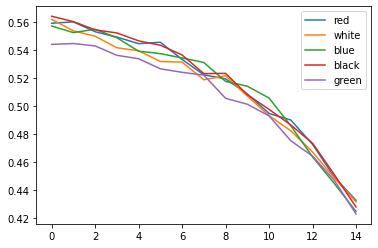

In [169]:
plt.plot(avg_by_color(best_color_pick, "red"), label="red")
plt.plot(avg_by_color(best_color_pick, "white"), label="white")
plt.plot(avg_by_color(best_color_pick, "blue"), label="blue")
plt.plot(avg_by_color(best_color_pick, "black"), label="black")
plt.plot(avg_by_color(best_color_pick, "green"), label="green")
plt.legend()
plt.show()

In [205]:
best_color_pick = defaultdict(list)
for i in range(100):
    print(i, end =" ")
    players = [ColorPicker(grades, "GW"),
               ColorPicker(grades, "RG"),
               ColorPicker(grades, "GU"),
               ColorPicker(grades, "RW"),
               ColorPicker(grades, "GB"),
               ColorPicker(grades, "UG"),
               ColorPicker(grades, "RG"),
               ColorPicker(grades, "UB")]
    pod = Simulator(players, booster_simple_vow)
    players[0].pre_pick = MethodType(pre_pick, players[0])
    pod.start()

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 

In [208]:
#no_green = best_color_pick
#one_green = best_color_pick
#two_green = best_color_pick
#three_green = best_color_pick
#four_green = best_color_pick
#three_green = best_color_pick
five_green = best_color_pick

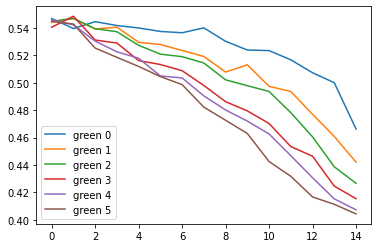

In [207]:
#plt.plot(avg_by_color(four_green, "red"), label="red")
#plt.plot(avg_by_color(four_green, "white"), label="white")
#plt.plot(avg_by_color(four_green, "blue"), label="blue")
#plt.plot(avg_by_color(four_green, "black"), label="black")
plt.plot(avg_by_color(no_green, "green"), label="green 0")
plt.plot(avg_by_color(one_green, "green"), label="green 1")
plt.plot(avg_by_color(two_green, "green"), label="green 2")
plt.plot(avg_by_color(three_green, "green"), label="green 3")
plt.plot(avg_by_color(four_green, "green"), label="green 4")
plt.plot(avg_by_color(five_green, "green"), label="green 5")
plt.legend()
plt.show()

In [273]:
%run player.ipynb

In [274]:
def post_pick(self, cards, pick):
    print(self.cards_picked)
    colors = []
    for key, card_list in self.cards_by_color.items():
        avg_quality = np.array([self.grades.loc[card].win_rate for card in card_list]).mean() + len(card_list) * 0.004 
        colors.append((key, avg_quality))
    print(colors)
    print(pick)
    print()

players = [DynamicColorPicker(grades),
           DynamicColorPicker(grades),
           DynamicColorPicker(grades),
           DynamicColorPicker(grades),
           DynamicColorPicker(grades),
           DynamicColorPicker(grades),
           DynamicColorPicker(grades),
           DynamicColorPicker(grades)]
#players[0].post_pick = MethodType(post_pick, players[0])
pod = Simulator(players, booster_simple_vow)
pod.start()

In [275]:
for player in players:
    colors = []
    for key, card_list in player.cards_by_color.items():
        number = len(card_list)
        colors.append((key, number))
    print (sorted(colors, key = lambda x: -x[1])[:2])


[('G', 24), ('U', 14)]
[('U', 19), ('B', 14)]
[('B', 23), ('U', 5)]
[('R', 22), ('W', 14)]
[('W', 22), ('G', 16)]
[('B', 21), ('R', 15)]
[('U', 21), ('B', 13)]
[('R', 23), ('W', 17)]
